# Final Fundamentals of Statstics Project

## ***30 years CAD Interest Rate Analysis in London International Banking Offerd Rate (LIBOR)***

#### Yilak Kebede

## Part 1- Introduction

### *** What is the project about ***
This project demonstrates interest rates relationship with respect to their maturity date in a time-series data

### What is LIBOR?  
LIBOR is the average interest rate at which major global banks borrow from one another. It is based on five currencies and  7 different maturities.Rises and falls in the LIBOR interest rates can therefore have consequences for the interest rates on all sorts of banking products such as savings accounts, mortgages and loans.  In this project I used only CAD and USD to explore the relationship of interest rate over different maturities.

### What is in the Data?
I used only six maturities, which are 1 day, 1 week, 1 month, 3 months, 6months and 12 months. The data is 'xts' object on 1990-05-01/2013-05-31 containing 5834 observations. I removed the 1 day and 1 week data from combined analysis with other maturities as the NA's values account for about 47% the data. The extreme values ( min and max) found in one month rate, which makes sense given its exposure to volatility. There are no gaps between the time series of > 3 days/observations.From the above "any" function usage, we can conclude there is a gap but not more than 3 days difference. This presence of gaps may or may not be critical depending on the purpose of the assessment, however, I tried to see its other dimensions with respect to Holiday times. 

### What I got from the analysis
The lag/increment analysis has helped me to understand the relationship between different period interest rate, the effect of ongoing events such as recession which take long time to realize its consequence. I used linear interpolation (na.approx) as it is suitable for data with trends but not seasonal. 
Principal component analysis is frequently used to capture the variability in the movement of interest rates along the term structure. Understanding the variability allows for creation of stressed interest rate term-structures that can be applied as part of a risk management program wherever the uncertainty of interest rates is a concern. Varying degrees of stress can be applied in the fashion of analytical Value-at-Risk (VaR) techniques.

### Analysis Questions
1) how the yield curve varying alonge different maturities? 
2) which principal component could positively or negatively affect any the interest rate outcomes/ predictions?
2) What can we draw from non-seasonal time series data that supports out decision to predict interest rate?

Answering these question will give us a sense of how LIBOR affect the bench mark of bank products

##   Part 2- Data 
### Data Collection
Data is collected by the US Federal Reserve Bank of St. Louis. LIBOR interest rate data is available in 8 maturities and is pulled via "quantmod".

US Federal Reserve
https://fred.stlouisfed.org/

### R Libraries
 This project utilizes xts, quantmod, ggplot2, and reshape2 packages. The xts package is useful for storing time series data while quantmod allows for reading data. The latter is especially helpful for reading LIBOR data from the source.The ggplot2 package is a well known plotting package used to generate the graphs. 

In [2]:
library(quantmod)
library(fitdistrplus)
library(corrplot)
library(ggplot2)
library(data.table)
library(caTools)
library(xts)
library(zoo)
library(ggcorrplot)
options(warn=-1)


### Load LIBOR data:- For all maturities / tenors

In [4]:
# choosing for selected tenors (1month, 3 months, 6 months, 12 months)
CAD = c("CAD1MTD156N","CAD3MTD156N","CAD6MTD156N","CAD12MD156N")
loadSymbols(CAD,src="FRED")
CADBind=cbind(CAD1MTD156N,CAD3MTD156N,CAD6MTD156N,CAD12MD156N)
CADNa= na.approx(CADBind)
CADLibor= diff(CADNa)
options(warn=-1)

[1] "CAD1MTD156N" "CAD3MTD156N" "CAD6MTD156N" "CAD12MD156N"

In [5]:
USD = c("USD1MTD156N","USD3MTD156N","USD6MTD156N","USD12MD156N")
getSymbols(USD,src ="FRED")
USDBind = cbind(USD1MTD156N,USD3MTD156N,USD6MTD156N,USD12MD156N)
USDNa= na.approx(USDBind)
USDLibor= diff(USDNa)

[1] "USD1MTD156N" "USD3MTD156N" "USD6MTD156N" "USD12MD156N"

The max and min value (the extreams) for both CAD and USD varies, which entails the the outliers might not have global impact. However the minimum value registred in CAD-LIBOR on "1998-09-02" might have a strong relationship with 1998 Russian financial crises following the decision to abandon the "floating peg" policy and float the ruble freely. At that time the exchange rate had reached 21 rubles for one US dollar, meaning it had lost two thirds of its value of less than a month earlier.

In [6]:
which.max(CADLibor)
CADLibor[612]
which.min(CADLibor)
CADLibor[2107]
which.max(USDLibor)
USDLibor[253]
which.min(USDLibor)
CADLibor[1302]

[1] 612

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1992-09-30     3.07812      1.9375      1.3125     0.85938

[1] 2107

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1998-09-02    -1.11719    -1.07812    -1.03125    -0.94531

[1] 253

           USD1MTD156N USD3MTD156N USD6MTD156N USD12MD156N
1986-12-22      1.3281      0.3125      0.2031      0.1875

[1] 1302

           CAD1MTD156N CAD3MTD156N CAD6MTD156N CAD12MD156N
1995-06-27      0.0625     0.10937      0.0625      0.0625

In [7]:
CADxts = xts(x=CADLibor,order.by= as.Date(index(CADLibor)))
USDxts = xts(x=USDLibor,order.by= as.Date(index(USDLibor)))

The time series doesnt have data gaps for > 3 days in the USD, however the CAD have gaps for more than 3 days. 

In [8]:
GapsUSD = diff(zoo::index(USDxts))
GapsCAD = diff(zoo::index(CADxts))
any(GapsCAD >1)
any(GapsCAD >2)
any(GapsCAD >3)
any(GapsUSD >1)
any(GapsUSD >2)
any(GapsUSD >3)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

I choose the 3month maturity to examine the trend as it the most common bench mark for the financial industry

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


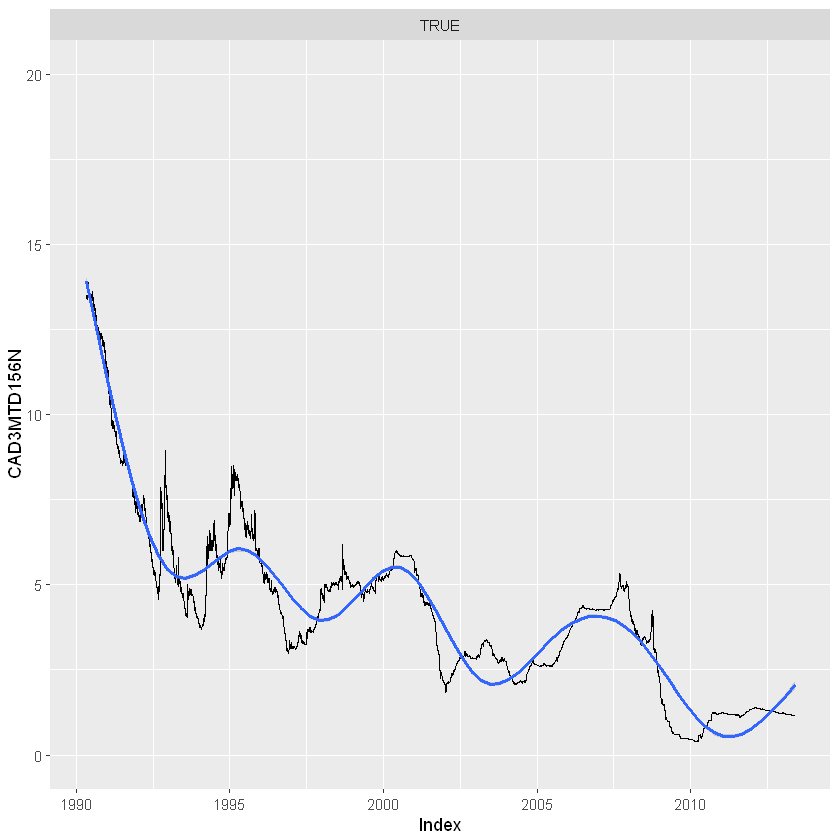

In [10]:
autoplot(CADBind$CAD3MTD156N,ylim=c(0,20),facets = TRUE) + geom_smooth()

To be able to identify the location of multiple change points within thetime series, I used "changepoint" package to assess the mean shift exhibited during the period.  As the figure below shows, the changepoint detection tried to estimating the point at which the statistical properties of a sequence of observations change. 

Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


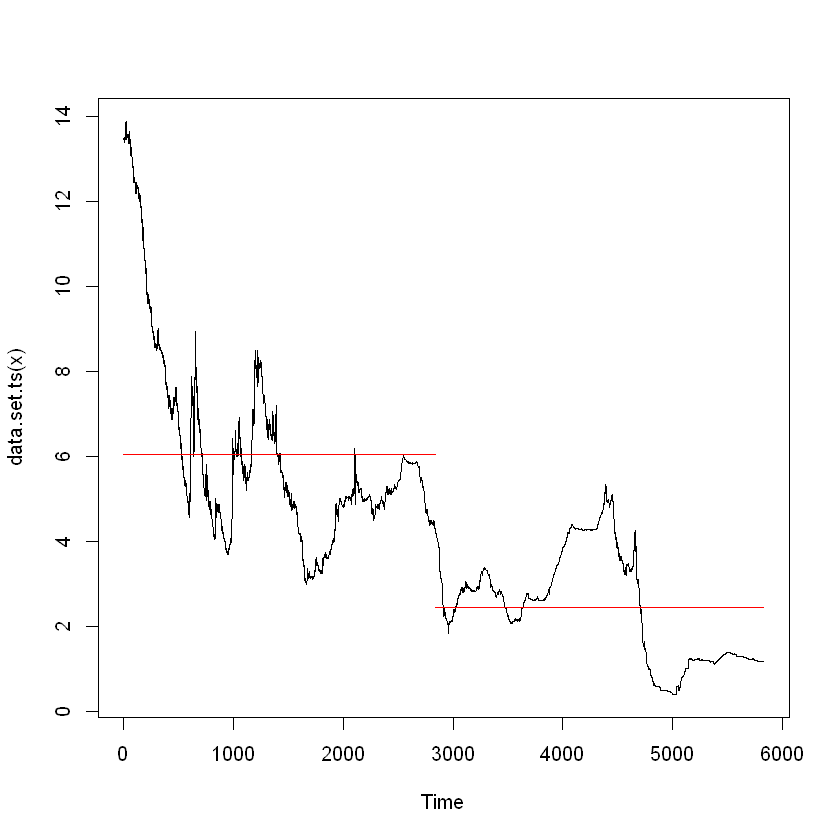

In [11]:
library(changepoint)
dataout= CADBind$CAD3MTD156N[!is.na(CADBind$CAD3MTD156N),]
out=cpt.mean(as.numeric(dataout),penalty="MBIC",pen.value=0,method="AMOC",Q=5,test.stat="Normal",class=TRUE,param.estimates=TRUE,minseglen=1)
plot(out,diagnostic=TRUE )

## Part-3 Data Analysis

### Interest rate jumps ver  a year (252 days)

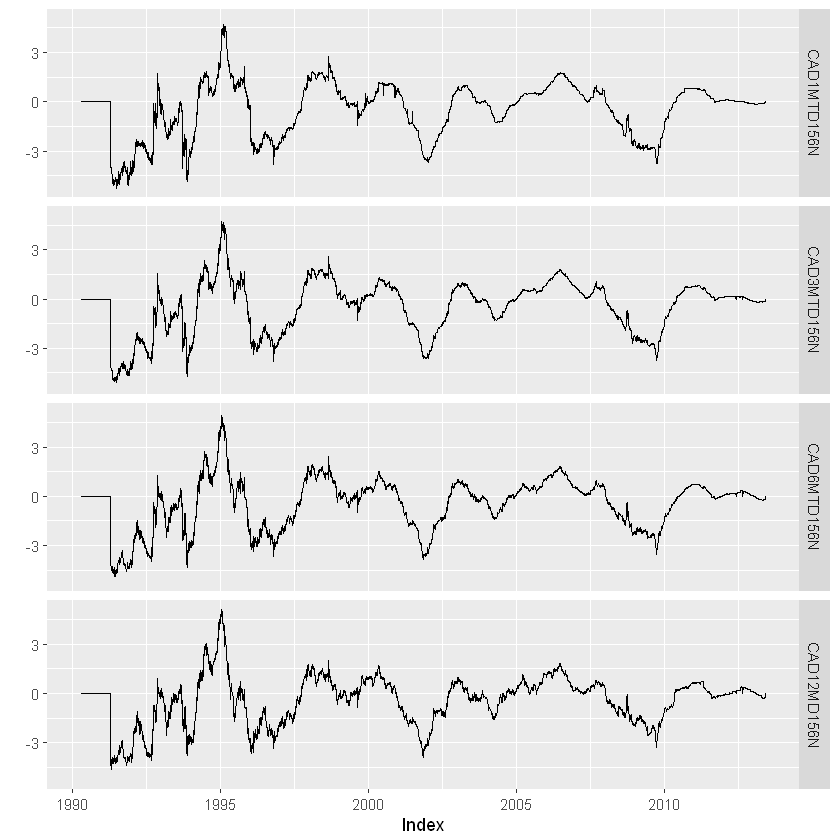

In [12]:
CADjumps = diff(CADBind, lag=250)
CADjumps[is.na(CADjumps)] <- 0
autoplot(CADjumps)

### 1-Day and 30-Days Interest Rate Increment

In [14]:
CAD1Increment= diff(CADLibor)
CAD1Increment[is.na(CAD1Increment)] <- 0
CAD30Increment= diff(CADLibor, lag=30, differences = 1)
CAD30Increment[is.na(CAD30Increment)] <- 0
Increment1=autoplot(CAD1Increment)
Increment30=autoplot(CAD30Increment)

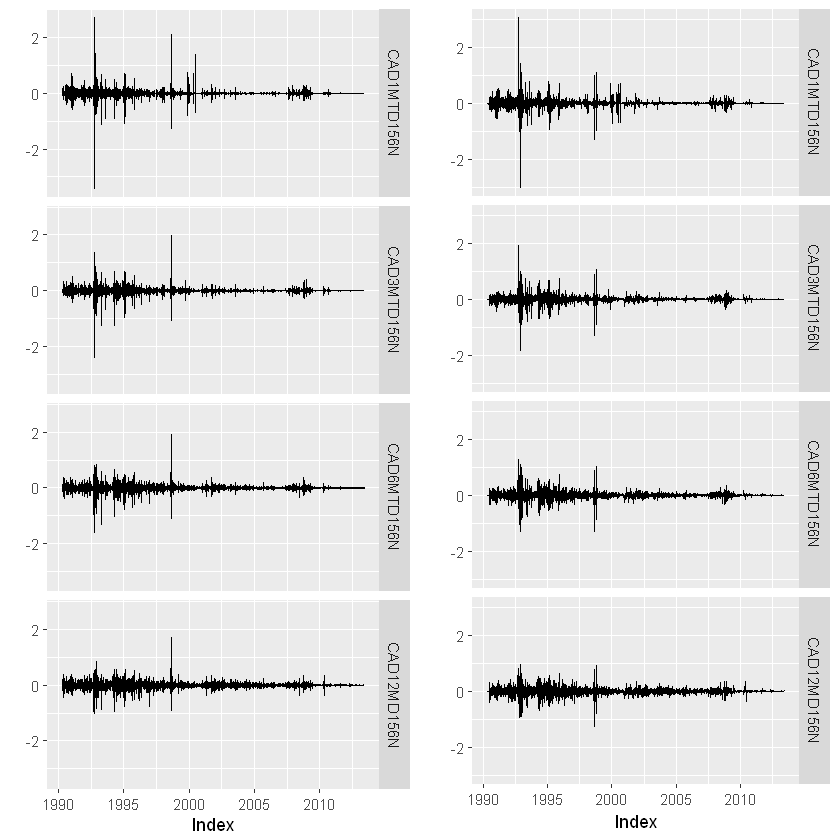

In [15]:
library(gridExtra)
grid.arrange(Increment1,Increment30, nrow=1)

### Comparaing 1Day Increment and 30 Days Incremement Distribution on 3Month Rate

The distribution 1 day increment and 30 days increment could give a picture on what kind of distribution the time series has. The interest rate increment will take the bell shaped normal distribution pattern for longer maturity rates and for 30days increment in particular. This is due to Central Limit Theorem that basically states with sample size increases, the distribution of the sample mean of a parameter becomes normally distributed, regardless of the underlying distribution of data.

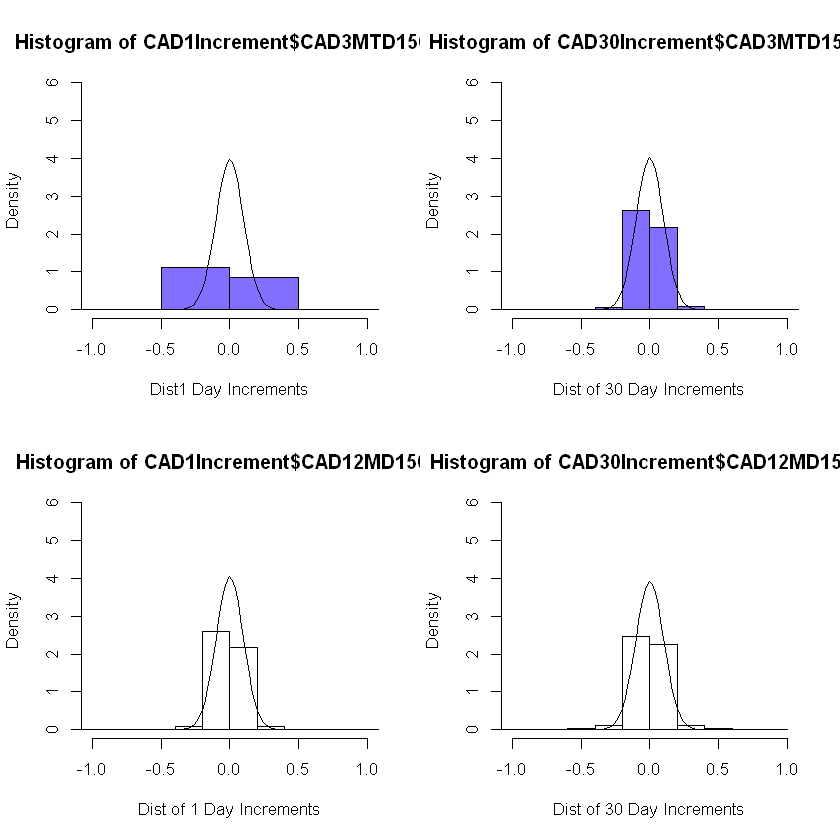

In [16]:
par(mfrow=c(2,2))
hist(CAD1Increment$CAD3MTD156N, freq=F,col="slateblue1", xlab='Dist1 Day Increments',ylim=c(0,5.8),xlim=c(-1,1))
curve(dnorm(x, mean=mean(CAD1Increment[,"CAD3MTD156N"]), sd=sd(CAD1Increment[,"CAD3MTD156N"])), add=TRUE)
hist(CAD30Increment$CAD3MTD156N, freq=F,col="slateblue1", xlab='Dist of 30 Day Increments',ylim=c(0,5.8),xlim=c(-1,1))
curve(dnorm(x, mean=mean(CAD30Increment[,"CAD3MTD156N"]), sd=sd(CAD30Increment[,"CAD3MTD156N"])), add=TRUE)
hist(CAD1Increment$CAD12MD156N, freq=F, xlab='Dist of 1 Day Increments',ylim=c(0,5.8),xlim=c(-1,1))
curve(dnorm(x, mean=mean(CAD1Increment[,"CAD12MD156N"]), sd=sd(CAD1Increment[,"CAD12MD156N"])), add=TRUE)
hist(CAD30Increment$CAD12MD156N, freq=F, xlab='Dist of 30 Day Increments',ylim=c(0,5.8),xlim=c(-1,1))
curve(dnorm(x, mean=mean(CAD30Increment[,"CAD12MD156N"]), sd=sd(CAD30Increment[,"CAD12MD156N"])), add=TRUE)

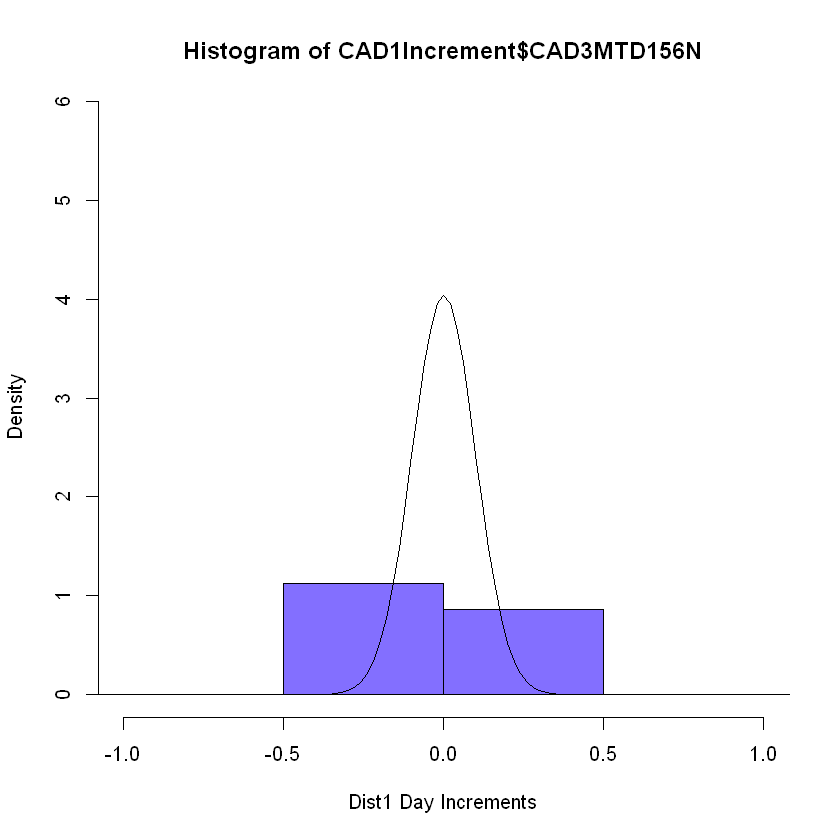

In [17]:
hist(CAD1Increment$CAD3MTD156N, freq=F,col="slateblue1", xlab='Dist1 Day Increments',ylim=c(0,5.8),xlim=c(-1,1), breaks=15)
curve(dnorm(x, mean=mean(CAD1Increment[,"CAD12MD156N"]), sd=sd(CAD1Increment[,"CAD12MD156N"])), add=TRUE)

### Linear regression 
Comparing the two types of increments via linear regression model, the relationship of the maturies, is better for 30 days increment, given the R-squared is high for 30 days increment.

In [18]:
model1= lm(CAD1Increment$CAD3MTD156N~CAD1Increment$CAD6MTD156N+CAD1Increment$CAD12MD156N, data = CAD1Increment)
summary(model1)


Call:
lm(formula = CAD1Increment$CAD3MTD156N ~ CAD1Increment$CAD6MTD156N + 
    CAD1Increment$CAD12MD156N, data = CAD1Increment)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04829 -0.01288  0.00000  0.01285  0.70658 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -4.043e-06  6.500e-04  -0.006    0.995    
CAD1Increment$CAD6MTD156N  7.830e-01  1.369e-02  57.206  < 2e-16 ***
CAD1Increment$CAD12MD156N  9.482e-02  1.401e-02   6.767 1.44e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04965 on 5831 degrees of freedom
Multiple R-squared:  0.7565,	Adjusted R-squared:  0.7564 
F-statistic:  9059 on 2 and 5831 DF,  p-value: < 2.2e-16


In [19]:
model30= lm(CAD30Increment$CAD3MTD156N~CAD30Increment$CAD6MTD156N+CAD30Increment$CAD12MD156N, data = CAD30Increment)
summary(model30)


Call:
lm(formula = CAD30Increment$CAD3MTD156N ~ CAD30Increment$CAD6MTD156N + 
    CAD30Increment$CAD12MD156N, data = CAD30Increment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70100 -0.01187  0.00005  0.01234  0.79133 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -4.712e-05  5.945e-04  -0.079    0.937    
CAD30Increment$CAD6MTD156N  8.860e-01  1.382e-02  64.122   <2e-16 ***
CAD30Increment$CAD12MD156N -2.222e-02  1.386e-02  -1.603    0.109    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04541 on 5831 degrees of freedom
Multiple R-squared:  0.7915,	Adjusted R-squared:  0.7915 
F-statistic: 1.107e+04 on 2 and 5831 DF,  p-value: < 2.2e-16


# Correlation between terms/ maturities 

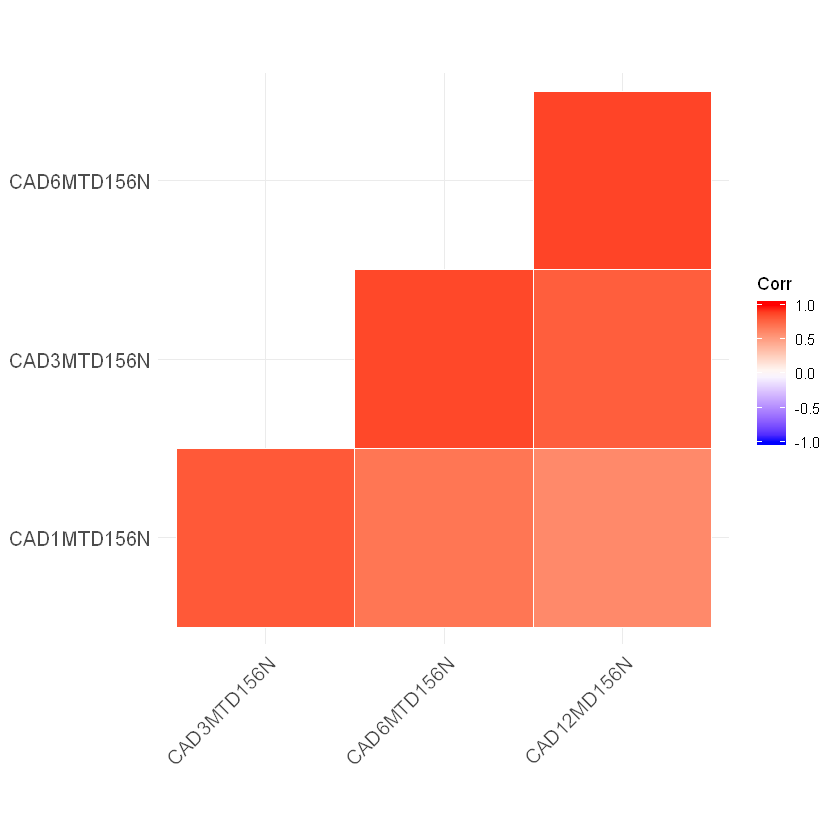

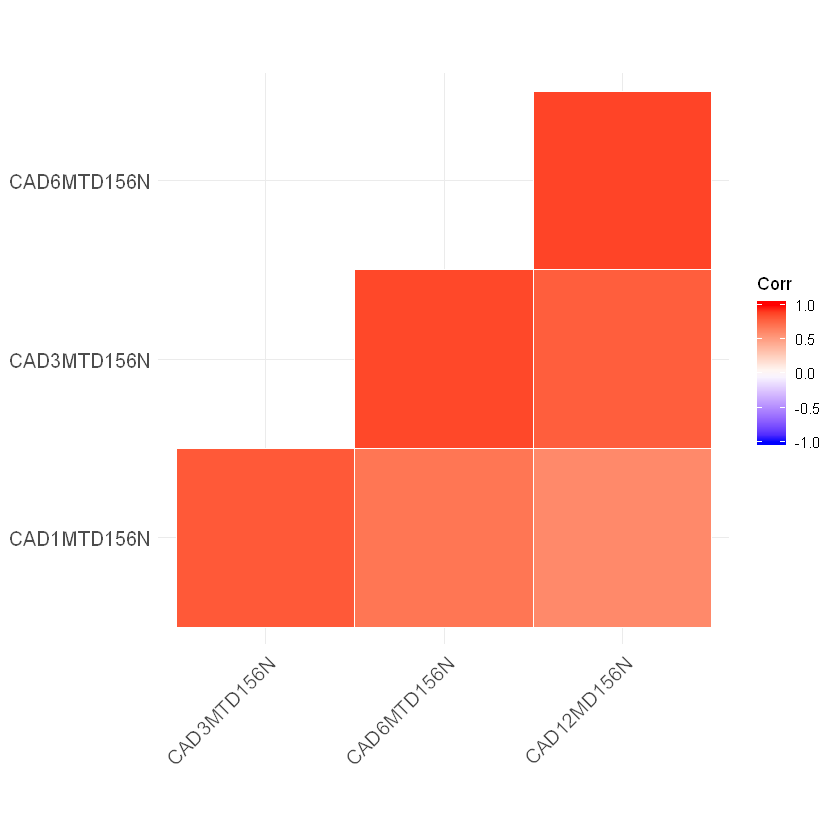

In [20]:
A = round(cor(CAD1Increment), 4)
B= round(cor(CAD1Increment),4)
ggcorrplot(A,type = "lower", outline.col = "white")
ggcorrplot(B,type = "lower", outline.col = "white")

# Yeild Curve/ term structure calculation

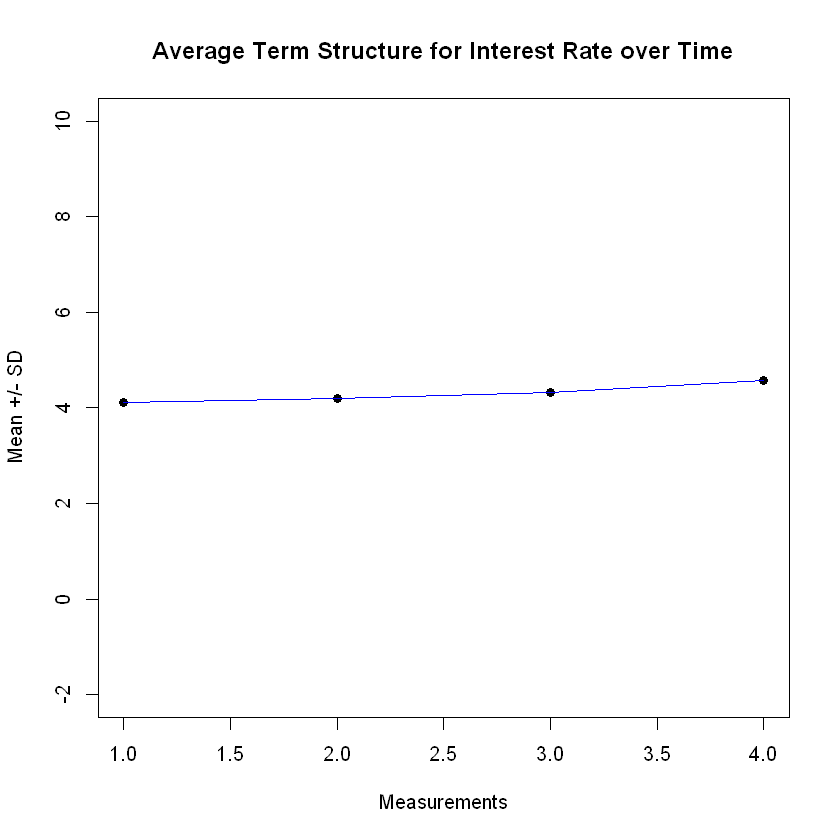

In [21]:
# selecting few tem of strucutres
b1=mean(na.omit(CADBind$CAD1MTD156N))
b2=mean(na.omit(CADBind$CAD3MTD156N))
b3=mean(na.omit(CADBind$CAD6MTD156N))
b4=mean(na.omit(CADBind$CAD12MD156N))

c1=apply(CADBind$CAD1MTD156N,2,sd)
c2=apply(CADBind$CAD3MTD156N,2,sd)
c3=apply(CADBind$CAD6MTD156N,2,sd)
c4=apply(CADBind$CAD12MD156N,2,sd)

TermStructure= c(1,2,3,4)
avg= c(b1,b2,b3,b4)
sdev = c(c1,c2,c3,c4)
plot(TermStructure, avg, ylim=(c(-2, 10)),pch=19, xlab="Measurements", ylab="Mean +/- SD",main="Average Term Structure for Interest Rate over Time")
arrows(TermStructure, avg-sdev, TermStructure, avg+sdev, length=0.05, angle=90, code=3,col="red")
lines((avg), col="blue") 

### Principal Component Interpretation
In this section the sign of the key principal components are changed to align with interpretations :
1) the first principal component is highly correlated with the rates of all maturities and the correlations
2) the second principal component is negatively correlated with short-maturity rates and positively correlated with long-maturity series. This allows for an interpretation of the second principal component as a factor that tilts the term structure (“steepness”)


[1] "data.frame"

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.8350 0.6771 0.32901 0.25737
Proportion of Variance 0.8418 0.1146 0.02706 0.01656
Cumulative Proportion  0.8418 0.9564 0.98344 1.00000

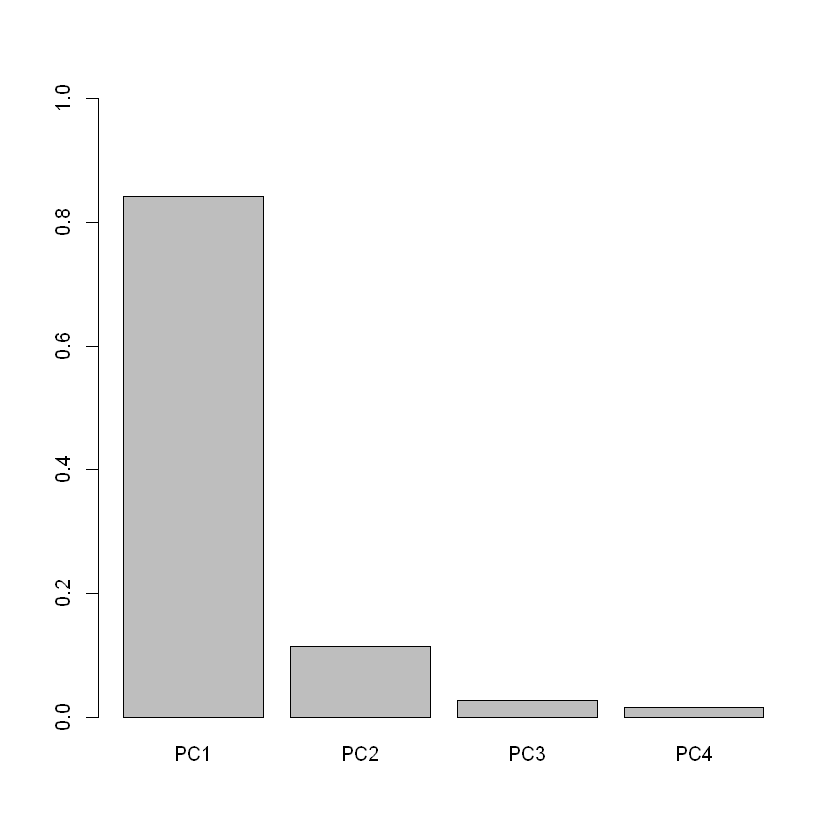

In [22]:
CADPCA = na.omit(CAD30Increment[-c(1,2),])
x=as.xts(CADPCA, dateFormat= 'Date')
df=fortify.zoo(x)
class(df)

df.pca=prcomp(df[,c(2:5)],  scale. = TRUE)
summary(df.pca)

t = summary(df.pca)
barplot(t[["importance"]][2,], ylim=c(0,1))

#Therefore the variance explained by the first 3 Principle Components is 99.75%

In [23]:
library(ggbiplot)

Loading required package: plyr
Loading required package: scales
Loading required package: grid


#### The second principal component is negatively correlated with short-maturity rates and positively correlated with long-maturity series.

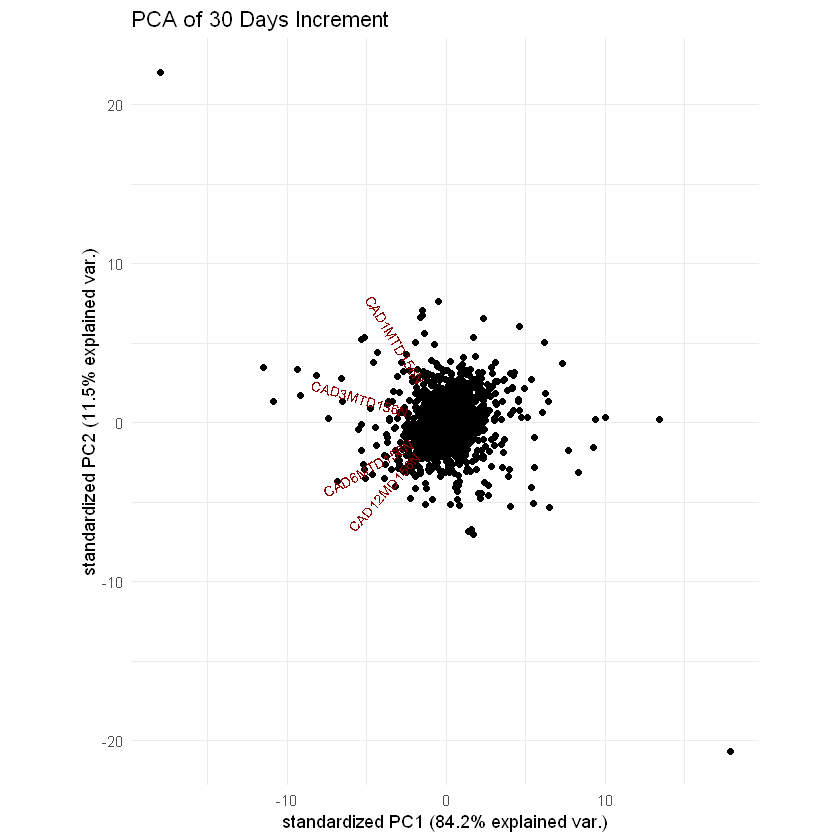

In [24]:
ggbiplot(df.pca,ellipse=FALSE, bs.scale = 0, var.scale = 0,  labels=rownames(df.pca))+
  ggtitle("PCA of 30 Days Increment")+
  theme_minimal()+
  theme(legend.position = "bottom")
